Step: 1 Import Libraries

In [8]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Step 2: Check the version of tensorflow running in your container

In [3]:
print(tf.__version__)

2.10.0


Step 3: Check if GPU is available and your container is using GPU t run your code

In [25]:
# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU found. Using CPU instead.")

Default GPU Device: /device:GPU:0


Step 4: Check if you get same output. If not please check your values.yaml and debug the issue

Step 5: Load Data

To begin, we need to import the data and split it into training and testing datasets. The MNIST dataset, which is readily available in TensorFlow, has already been pre-divided for convenience. Execute the following code cell to import the dataset.

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'c:\\Users\\sathv\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

Step 6: Normalization and Reshaping

In [6]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

Step 7: Label Encoding

In [7]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

Step 8: Visualize Data

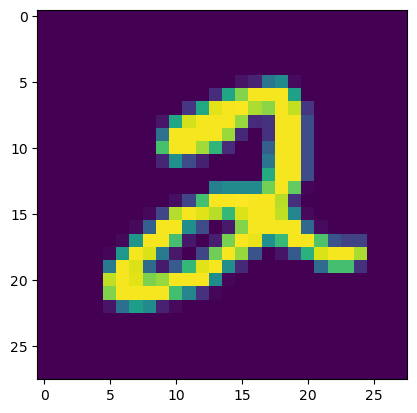

In [15]:
plt.imshow(x_train[5][:,:,0])
# print(y_train[5])

Step 8: Define Model

In [16]:
batch_size = 64
num_classes = 10
epochs = 5

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

Step 8: Fit Train Data

In [19]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    )

Epoch 1/5
844/844 [==============================] - 9s 9ms/step - loss: 0.2189 - acc: 0.9324 - val_loss: 0.0372 - val_acc: 0.9890
Epoch 2/5
844/844 [==============================] - 7s 9ms/step - loss: 0.0733 - acc: 0.9797 - val_loss: 0.0356 - val_acc: 0.9900
Epoch 3/5
844/844 [==============================] - 7s 9ms/step - loss: 0.0578 - acc: 0.9835 - val_loss: 0.0342 - val_acc: 0.9908
Epoch 4/5
844/844 [==============================] - 8s 9ms/step - loss: 0.0512 - acc: 0.9854 - val_loss: 0.0313 - val_acc: 0.9908
Epoch 5/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0504 - acc: 0.9860 - val_loss: 0.0294 - val_acc: 0.9920


Step 9: Evaluate the Model

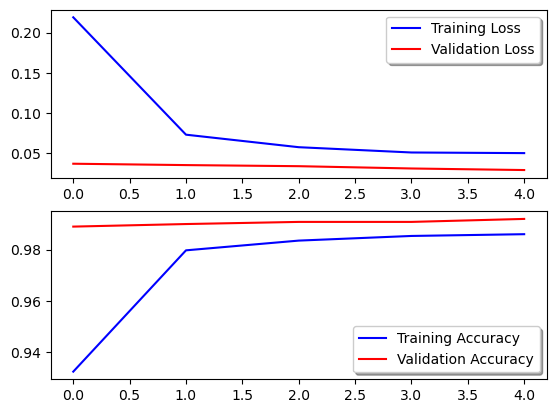

In [20]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Step 10: Predict Results

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0241 - acc: 0.9928


Step 11: Confusion Matrix

In [23]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 1s 2ms/step


In [24]:
confusion_mtx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1130,    1,    1,    0,    0,    0,    3,    0,    0],
       [   1,    0, 1027,    0,    0,    0,    0,    3,    1,    0],
       [   0,    0,    0, 1003,    0,    4,    0,    2,    1,    0],
       [   0,    0,    0,    0,  971,    0,    4,    0,    0,    7],
       [   0,    0,    1,    2,    0,  887,    1,    1,    0,    0],
       [   2,    4,    0,    0,    1,    1,  950,    0,    0,    0],
       [   0,    1,    2,    0,    0,    0,    0, 1021,    1,    3],
       [   2,    1,    0,    1,    0,    1,    0,    2,  966,    1],
       [   0,    0,    0,    0,    7,    3,    0,    3,    0,  996]])>

## source code from kaggle: https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial